In [2]:
import numpy as np
import matplotlib.pyplot as plt

seed = 0

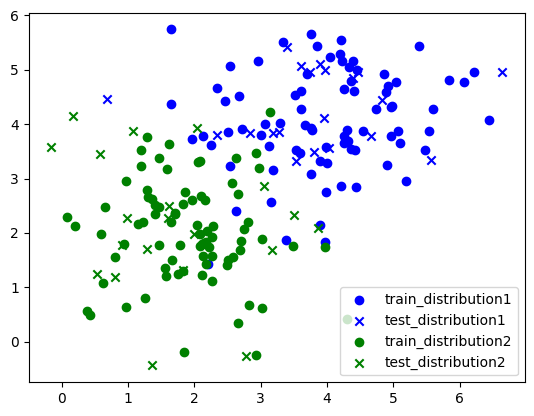

In [3]:
mean1 = [4, 4] # change to [3, 3], [5, 5] etc.
cov1 = [[1, 0], [0, 1]] # change to [[0.5, 0], [0, 0.5]] , [[2, 0], [0, 2]]  etc.
mean2 = [2, 2]
cov2 = [[1, 0], [0, 1]]
# Sample 100 points from each
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
# Keep 80 points per distribution as the training (160 in total)
training_inputs = np.vstack((np.hstack((x1[:80], x2[:80])), np.hstack((y1[:80], y2[:80])))).T
labels = np.hstack((np.ones(80), -np.ones(80)))
# 20 for the test (40 in total)
test_inputs = np.vstack((np.hstack((x1[80:], x2[80:])), np.hstack((y1[80:], y2[80:])))).T
test_labels = np.hstack((np.ones(20), -np.ones(20)))

plt.clf()
plt.scatter(x1[:80], y1[:80], c='b', marker='o', label='train_distribution1')
plt.scatter(x1[80:], y1[80:], c='b', marker='x', label='test_distribution1')
plt.scatter(x2[:80], y2[:80], c='g', marker='o', label='train_distribution2')
plt.scatter(x2[80:], y2[80:], c='g', marker='x', label='test_distribution2')
plt.legend(loc='lower right')

0.925 19.859046796104003


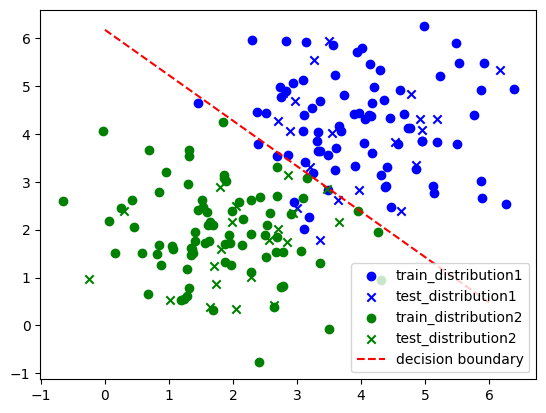

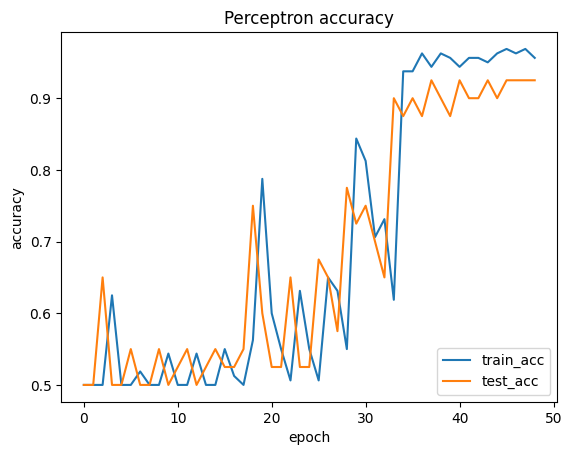

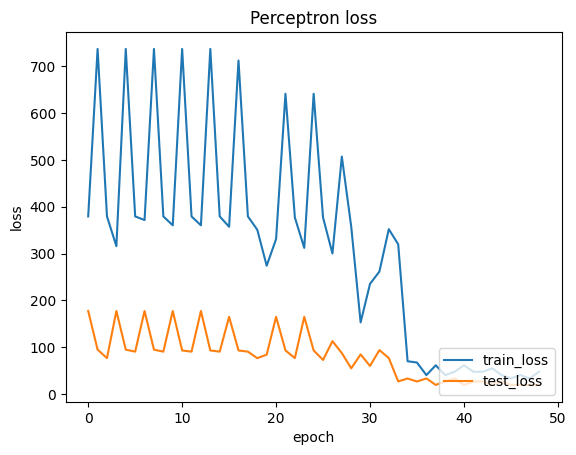

In [4]:
from perceptron import Perceptron

np.random.seed(seed)
mean1 = [4, 4]
cov1 = [[1, 0], [0, 1]]
mean2 = [2, 2]
cov2 = [[1, 0], [0, 1]]
# Sample 100 points from each
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
# Keep 80 points per distribution as the training (160 in total)
training_inputs = np.vstack((np.hstack((x1[:80], x2[:80])), np.hstack((y1[:80], y2[:80])))).T
labels = np.hstack((np.ones(80), -np.ones(80)))
# 20 for the test (40 in total)
test_inputs = np.vstack((np.hstack((x1[80:], x2[80:])), np.hstack((y1[80:], y2[80:])))).T
test_labels = np.hstack((np.ones(20), -np.ones(20)))

plt.scatter(x1[:80], y1[:80], c='b', marker='o', label='train_distribution1')
plt.scatter(x1[80:], y1[80:], c='b', marker='x', label='test_distribution1')
plt.scatter(x2[:80], y2[:80], c='g', marker='o', label='train_distribution2')
plt.scatter(x2[80:], y2[80:], c='g', marker='x', label='test_distribution2')

# Initialize the perceptron
p = Perceptron(n_inputs=2, max_epochs=49, learning_rate=0.01, print_flag=False) # we should adjust the epoch to get the best result

# Train the perceptron
p.train(training_inputs, labels, test_inputs, test_labels)

# Get the final test accuracy and loss
min_loss = min(p.test_losses)
max_acc = max(p.test_accs)
print(max_acc, min_loss)

# Plot the decision boundary
weight = p.weights[0]
x = np.linspace(0, 6, 100)
y = -weight[0] / weight[1] * x - weight[2] / weight[1]
plt.plot(x, y, 'r--', label='decision boundary')
plt.legend(loc='lower right')
plt.show()

# Plot the training and test accuracy
plt.clf()
plt.plot(p.train_accs, label='train_acc')
plt.plot(p.test_accs, label='test_acc')
plt.title('Perceptron accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()


# # plot the training and test loss
plt.clf()
plt.plot(p.train_losses, label='train_loss')
plt.plot(p.test_losses, label='test_loss')
plt.title('Perceptron loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

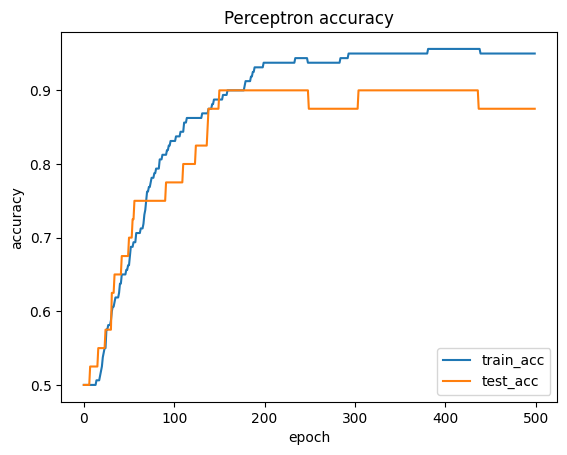

0.925 19.859046796104003


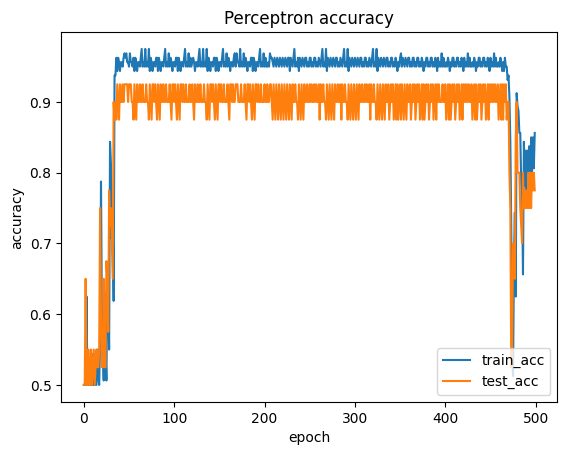

In [5]:
from perceptron_sigmoid import PerceptronSigmoid
np.random.seed(seed)
mean1 = [4, 4]
cov1 = [[1, 0], [0, 1]]
mean2 = [2, 2]
cov2 = [[1, 0], [0, 1]]
# Sample 100 points from each
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
# Keep 80 points per distribution as the training (160 in total)
training_inputs = np.vstack((np.hstack((x1[:80], x2[:80])), np.hstack((y1[:80], y2[:80])))).T
labels = np.hstack((np.ones(80), np.zeros(80)))
# 20 for the test (40 in total)
test_inputs = np.vstack((np.hstack((x1[80:], x2[80:])), np.hstack((y1[80:], y2[80:])))).T
test_labels = np.hstack((np.ones(20), np.zeros(20)))

# Initialize the perceptron
p = PerceptronSigmoid(n_inputs=2, max_epochs=500, learning_rate=0.1, batch_size=len(training_inputs), print_flag = False)
# Train the perceptron
p.train(training_inputs, labels, test_inputs, test_labels)

# Plot the training and test accuracy
plt.clf()
plt.plot(p.train_accs, label='train_acc')
plt.plot(p.test_accs, label='test_acc')
plt.title('Perceptron accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

np.random.seed(seed)
mean1 = [4, 4]
cov1 = [[1, 0], [0, 1]]
mean2 = [2, 2]
cov2 = [[1, 0], [0, 1]]
# Sample 100 points from each
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
# Keep 80 points per distribution as the training (160 in total)
training_inputs = np.vstack((np.hstack((x1[:80], x2[:80])), np.hstack((y1[:80], y2[:80])))).T
labels = np.hstack((np.ones(80), -np.ones(80)))
# 20 for the test (40 in total)
test_inputs = np.vstack((np.hstack((x1[80:], x2[80:])), np.hstack((y1[80:], y2[80:])))).T
test_labels = np.hstack((np.ones(20), -np.ones(20)))

plt.scatter(x1[:80], y1[:80], c='b', marker='o', label='train_distribution1')
plt.scatter(x1[80:], y1[80:], c='b', marker='x', label='test_distribution1')
plt.scatter(x2[:80], y2[:80], c='g', marker='o', label='train_distribution2')
plt.scatter(x2[80:], y2[80:], c='g', marker='x', label='test_distribution2')

# Initialize the perceptron
p = Perceptron(n_inputs=2, max_epochs=500, learning_rate=0.01, print_flag=False) # we should adjust the epoch to get the best result

# Train the perceptron
p.train(training_inputs, labels, test_inputs, test_labels)

# Get the final test accuracy and loss
min_loss = min(p.test_losses)
max_acc = max(p.test_accs)
print(max_acc, min_loss)


# Plot the training and test accuracy
plt.clf()
plt.plot(p.train_accs, label='train_acc')
plt.plot(p.test_accs, label='test_acc')
plt.title('Perceptron accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

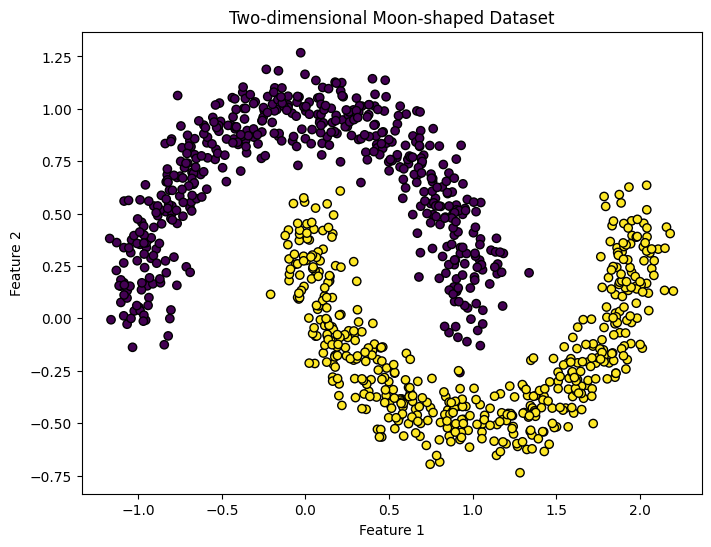

In [6]:
from sklearn.datasets import make_moons

# Create a dataset with 1,000 samples
X, y = make_moons(n_samples=1000, noise=0.1, random_state=seed) # we can adjust the noise to get different dataset 

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Two-dimensional Moon-shaped Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Step: 0, Train Loss: 0.6553, Train Accuracy: 52.38%, Test Loss: 0.6327, Test Accuracy: 57.50%
Step: 10, Train Loss: 0.6346, Train Accuracy: 53.25%, Test Loss: 0.6149, Test Accuracy: 59.50%
Step: 20, Train Loss: 0.6155, Train Accuracy: 54.87%, Test Loss: 0.5984, Test Accuracy: 61.00%
Step: 30, Train Loss: 0.5980, Train Accuracy: 62.00%, Test Loss: 0.5833, Test Accuracy: 68.00%
Step: 40, Train Loss: 0.5819, Train Accuracy: 75.25%, Test Loss: 0.5694, Test Accuracy: 76.50%
Step: 50, Train Loss: 0.5672, Train Accuracy: 76.75%, Test Loss: 0.5565, Test Accuracy: 76.50%
Step: 60, Train Loss: 0.5536, Train Accuracy: 78.38%, Test Loss: 0.5447, Test Accuracy: 78.50%
Step: 70, Train Loss: 0.5411, Train Accuracy: 80.12%, Test Loss: 0.5338, Test Accuracy: 78.50%
Step: 80, Train Loss: 0.5297, Train Accuracy: 81.00%, Test Loss: 0.5236, Test Accuracy: 79.00%
Step: 90, Train Loss: 0.5191, Train Accuracy: 82.38%, Test Loss: 0.5143, Test Accuracy: 81.00%
Step: 100, Train Loss: 0.5093, Train Accuracy: 83.0

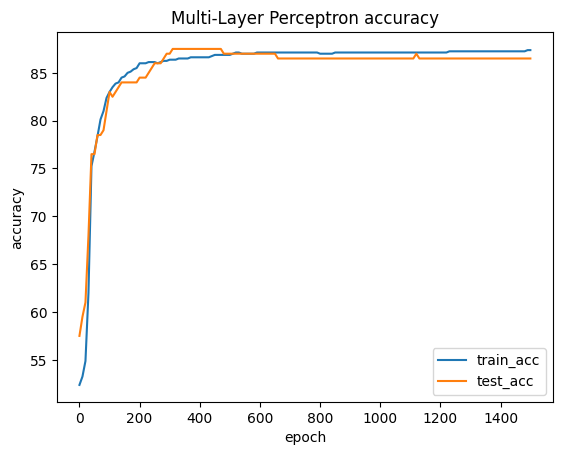

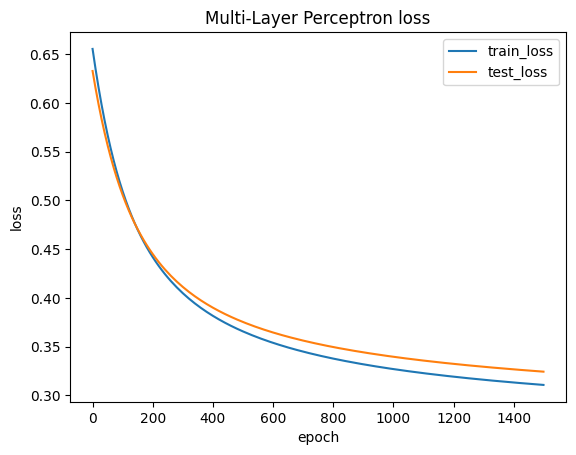

In [8]:
from train_mlp_numpy import accuracy, train, plot_acc, plot_loss
np.random.seed(seed)

# default values
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1500
EVAL_FREQ_DEFAULT = 10

train(DNN_HIDDEN_UNITS_DEFAULT, LEARNING_RATE_DEFAULT, MAX_EPOCHS_DEFAULT, EVAL_FREQ_DEFAULT)

epochs, train_accs, test_accs = plot_acc()
epochs, train_losses, test_losses = plot_loss()

plt.clf()
plt.plot(epochs, train_accs, label='train_acc')
plt.plot(epochs, test_accs, label='test_acc')
plt.title('Multi-Layer Perceptron accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

plt.clf()
plt.plot(epochs, train_losses, label='train_loss')
plt.plot(epochs, test_losses, label='test_loss')
plt.title('Multi-Layer Perceptron loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

In [10]:
bs = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 800]
for b in bs:
    print(b)
    train(DNN_HIDDEN_UNITS_DEFAULT, LEARNING_RATE_DEFAULT, MAX_EPOCHS_DEFAULT, EVAL_FREQ_DEFAULT, batch_size=b, print_flag=False)

1
0.38898131355264376 83.5
Training complete!
2
0.2646211827313424 91.0
Training complete!
4
0.2359605118468307 89.0
Training complete!
8
0.20981589875870327 92.5
Training complete!
16
0.22166768112644902 90.0
Training complete!
32
0.2293197782072805 92.0
Training complete!
64
0.21280106952386277 91.0
Training complete!
128
0.2647397482730024 88.5
Training complete!
256
0.2920446286311116 87.5
Training complete!
512
0.31587548730442355 87.5
Training complete!
800
0.3709898463305327 84.5
Training complete!


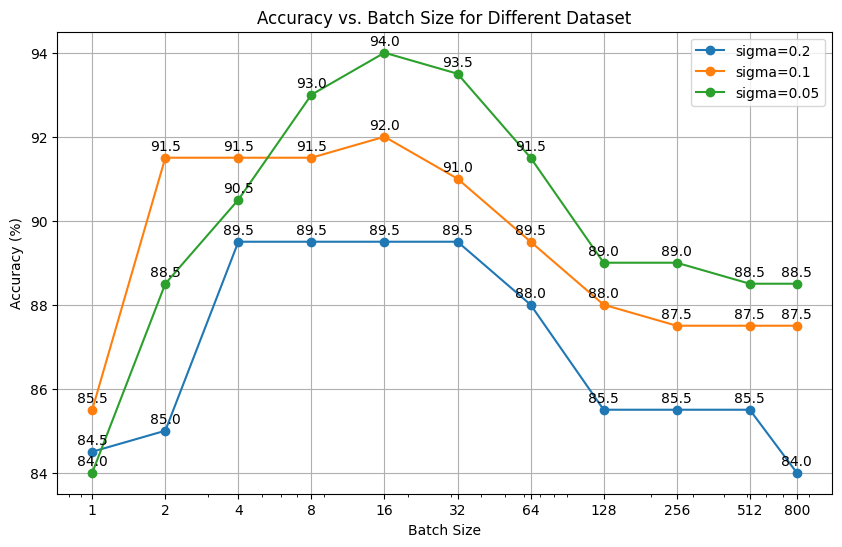

In [11]:
# Draw the plot
sigma_values = [0.2, 0.1, 0.05]
batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 800]
accuracy_values = {
    0.2: [84.5, 85, 89.5, 89.5, 89.5, 89.5, 88, 85.5, 85.5, 85.5, 84],
    0.1: [85.5, 91.5, 91.5, 91.5, 92, 91, 89.5, 88, 87.5, 87.5, 87.5],
    0.05: [84, 88.5, 90.5, 93, 94, 93.5, 91.5, 89, 89, 88.5, 88.5]
}

# Plotting
plt.figure(figsize=(10, 6))
for sigma, acc_values in accuracy_values.items():
    plt.plot(batch_sizes, acc_values, marker='o', label=f'sigma={sigma}')
    for i, txt in enumerate(acc_values):
        plt.annotate(f'{txt:.1f}', (batch_sizes[i], acc_values[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('Batch Size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Batch Size for Different Dataset')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.xticks(batch_sizes, batch_sizes)
plt.show()

